In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:

df = pd.read_excel('BCI backup.xlsx', sheet_name='Dummy leads')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Lead_ID                      20 non-null     object
 1   Booking_ID                   20 non-null     object
 2   Customer name                20 non-null     object
 3   Lead_Source                  20 non-null     object
 4   First_Time_Buyer             20 non-null     object
 5   Age                          20 non-null     int64 
 6   Gender                       20 non-null     object
 7   Location                     20 non-null     object
 8   Income                       20 non-null     int64 
 9   OEM_Loyalty_Program          20 non-null     object
 10  Finances_Status              20 non-null     object
 11  CIBIL_Score                  20 non-null     int64 
 12  Down_Payment                 20 non-null     int64 
 13  Undecided_Finances           20 non-n

In [3]:
df = df.fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Lead_ID                      20 non-null     object
 1   Booking_ID                   20 non-null     object
 2   Customer name                20 non-null     object
 3   Lead_Source                  20 non-null     object
 4   First_Time_Buyer             20 non-null     object
 5   Age                          20 non-null     int64 
 6   Gender                       20 non-null     object
 7   Location                     20 non-null     object
 8   Income                       20 non-null     int64 
 9   OEM_Loyalty_Program          20 non-null     object
 10  Finances_Status              20 non-null     object
 11  CIBIL_Score                  20 non-null     int64 
 12  Down_Payment                 20 non-null     int64 
 13  Undecided_Finances           20 non-n

In [4]:
df.describe()

,Age,Income,CIBIL_Score,Down_Payment,Customer_Satisfaction_Score
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000
mean,35.100000,1.297500e+06,752.500000,273000.000000,7.700000
std,6.881707,4.021243e+05,60.686858,183420.712829,1.380313
min,25.000000,7.500000e+05,650.000000,50000.000000,5.000000
25%,29.000000,9.500000e+05,707.500000,150000.000000,7.000000
50%,34.500000,1.300000e+06,755.000000,200000.000000,8.000000
75%,39.250000,1.550000e+06,800.000000,325000.000000,9.000000
max,50.000000,2.000000e+06,850.000000,700000.000000,9.000000


In [5]:
from rules import bci_rules, evaluate_condition

def addTargetValue(row):
    counts = 0
    for i in range(len(bci_rules)):
        if evaluate_condition(row[bci_rules[i]['value']], bci_rules[i]["condition"]):
            counts += 1
    if counts >= 10:
        return 1
    return 0

df['bciindex'] = df.apply(lambda row: addTargetValue(row), axis=1)
print(df['bciindex'].value_counts())
print(df['bciindex'].head())

bciindex
0    15
1     5
Name: count, dtype: int64
0    1
1    0
2    0
3    0
4    0
Name: bciindex, dtype: int64


In [6]:
def checkRows(row):
    row['Booking_Lead_Time'] = int(row['Booking_Lead_Time'].replace(' days', ''))
    row['Add_Ons'] = len(row['Add_Ons'].replace(' ', '').split(';'))
    row['OEM_Loyalty_Program'] = 1 if row['OEM_Loyalty_Program'] == 'Yes' else 0
    row['Special_Occasions'] = 0 if row['Special_Occasions'] == 'None' else 1
    return row
df['isMale'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Lead_Source'] = df['Lead_Source'].map({ 'Referral': 2 , 'Online': 1, 'Walk-in': 0})
df['Needs_Match'] = df['Needs_Match'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Dealership_Engagement'] = df['Dealership_Engagement'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Competitive_Factors'] = df['Competitive_Factors'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['External_Factors'] = df['External_Factors'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Cancellation_Probability'] = df['Cancellation_Probability'].map({ 'High': 2 , 'Medium': 1, 'Low': 0})
df['Preferred_Delivery_Time'] = df['Preferred_Delivery_Time'].map({ 'Evening': 2 , 'Afternoon': 1, 'Morning': 0})
df['isStockAvailable'] = df['Stock_Status'].map({'Available': 1, 'Unavailable': 0})
df['isOnDeliveryDate'] = df['Delivery_Date_Status'].map({'On-Time': 1, 'Delayed': 0})
df['isUndecidedFinances'] = df['Undecided_Finances'].map({'Yes': 1, 'No': 0})
df['isFirstTimeBuyer'] = df['First_Time_Buyer'].map({'Yes': 1, 'No': 0})
df['Test_Drive_Status'] = df['Test_Drive_Status'].map({'Completed': 1, 'Not Taken': 0})
df['Experience_With_Sales_Rep'] = df['Experience_With_Sales_Rep'].map({ 'Positive': 1 , 'Neutral': 0, 'Negative': -1})
df['Companion_Feedback'] = df['Companion_Feedback'].map({ 'Positive': 1 , 'Neutral': 0, 'Negative': -1})
# df['Special_Occasions'] = df['Special_Occasions'].map({ 'Wedding': 2 , 'Festival': 1, 'None': 0})
df = df.apply(checkRows, axis=1)
print(df['Add_Ons'].head())
print(df.describe())

0    2
1    1
2    1
3    1
4    1
Name: Add_Ons, dtype: int64
       Lead_Source        Age        Income  OEM_Loyalty_Program  CIBIL_Score  \
count    20.000000  20.000000  2.000000e+01            20.000000    20.000000   
mean      1.000000  35.100000  1.297500e+06             0.500000   752.500000   
std       0.794719   6.881707  4.021243e+05             0.512989    60.686858   
min       0.000000  25.000000  7.500000e+05             0.000000   650.000000   
25%       0.000000  29.000000  9.500000e+05             0.000000   707.500000   
50%       1.000000  34.500000  1.300000e+06             0.500000   755.000000   
75%       2.000000  39.250000  1.550000e+06             1.000000   800.000000   
max       2.000000  50.000000  2.000000e+06             1.000000   850.000000   

        Down_Payment  Special_Occasions  Booking_Lead_Time  Needs_Match  \
count      20.000000          20.000000          20.000000    20.000000   
mean   273000.000000           0.800000          20.55000

array([[<Axes: title={'center': 'Lead_Source'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'OEM_Loyalty_Program'}>,
        <Axes: title={'center': 'CIBIL_Score'}>],
       [<Axes: title={'center': 'Down_Payment'}>,
        <Axes: title={'center': 'Special_Occasions'}>,
        <Axes: title={'center': 'Booking_Lead_Time'}>,
        <Axes: title={'center': 'Needs_Match'}>,
        <Axes: title={'center': 'Add_Ons'}>],
       [<Axes: title={'center': 'Dealership_Engagement'}>,
        <Axes: title={'center': 'Experience_With_Sales_Rep'}>,
        <Axes: title={'center': 'Companion_Feedback'}>,
        <Axes: title={'center': 'Competitive_Factors'}>,
        <Axes: title={'center': 'External_Factors'}>],
       [<Axes: title={'center': 'Customer_Satisfaction_Score'}>,
        <Axes: title={'center': 'Cancellation_Probability'}>,
        <Axes: title={'center': 'Test_Drive_Status'}>,
        <Axes: title={'center': 

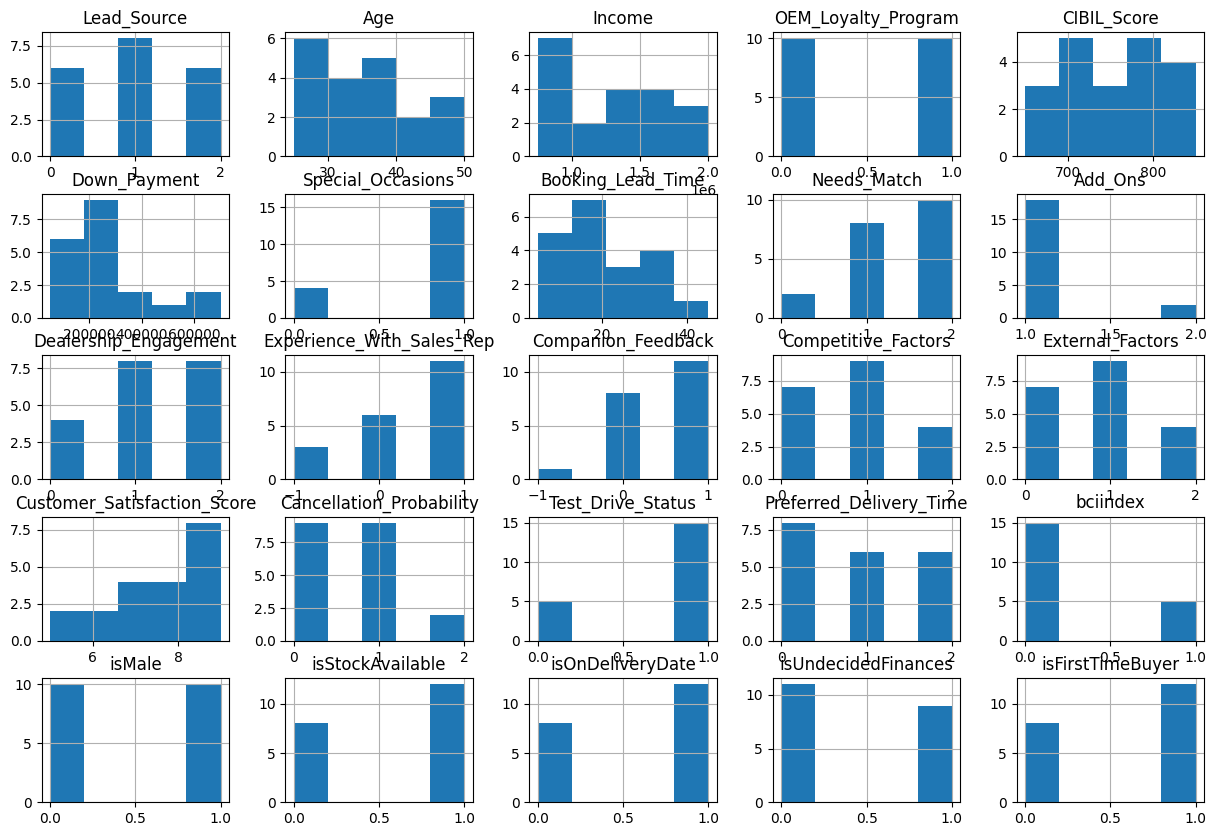

In [7]:
df.hist(bins=5, figsize=(15,10))

In [8]:
# import seaborn as sns
# df_filtered = df.select_dtypes(include=['int64', 'float64'])
# sns.pairplot(df_filtered)

In [9]:


first_time_buyers = df[df['First_Time_Buyer'] == 'Yes']['Customer_Satisfaction_Score']
repeat_customers = df[df['First_Time_Buyer'] == 'No']['Customer_Satisfaction_Score']

t_statistic, p_value = stats.ttest_ind(first_time_buyers, repeat_customers)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 0.51880524140054, P-value: 0.6102163399683445


In [10]:
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# models_encoded = mlb.fit_transform(df['Add_Ons'])
# models_encoded_df = pd.DataFrame(models_encoded, columns=mlb.classes_)
# df = df.join(models_encoded_df)
df = df.drop(['Lead_ID', 'Booking_ID', 'Customer name', 'Gender', 'Stock_Status', 'Delivery_Date_Status', 'Undecided_Finances', 'First_Time_Buyer', 'Location'], axis=1)
df.head()

,Lead_Source,Age,Income,OEM_Loyalty_Program,Finances_Status,CIBIL_Score,Down_Payment,Special_Occasions,Booking_Lead_Time,Needs_Match,...,Cancellation_Probability,Vehicle_Type,Test_Drive_Status,Preferred_Delivery_Time,bciindex,isMale,isStockAvailable,isOnDeliveryDate,isUndecidedFinances,isFirstTimeBuyer
0,1,28,1200000,1,Approved Loans,750,200000,1,15,2,...,0,SUV,1,0,1,0,1,1,0,1
1,0,35,1800000,0,Cash Purchase,800,500000,1,30,1,...,1,Sedan,0,1,0,1,0,0,0,0
2,2,45,1500000,1,Pending Loans,700,150000,0,10,0,...,2,Hatchback,1,2,0,0,1,1,1,1
3,1,32,800000,0,Undecided,670,100000,1,7,1,...,1,SUV,1,0,0,1,0,0,1,1
4,0,50,2000000,1,Cash Purchase,850,700000,0,45,2,...,0,Sedan,0,1,0,0,1,1,0,0


In [11]:
df_filtered = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
df_filtered.columns

Index(['Finances_Status', 'Vehicle_Type'], dtype='object')

In [12]:
from sklearn.preprocessing import OneHotEncoder
prusage_encoder = OneHotEncoder(sparse_output=False)
hot_encoded_data = prusage_encoder.fit_transform(df[df_filtered.columns])
one_hot_df = pd.DataFrame(hot_encoded_data, columns=prusage_encoder.get_feature_names_out(df_filtered.columns))
df = df.drop(df_filtered.columns, axis=1)
df = df.join(one_hot_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Lead_Source                     20 non-null     int64  
 1   Age                             20 non-null     int64  
 2   Income                          20 non-null     int64  
 3   OEM_Loyalty_Program             20 non-null     int64  
 4   CIBIL_Score                     20 non-null     int64  
 5   Down_Payment                    20 non-null     int64  
 6   Special_Occasions               20 non-null     int64  
 7   Booking_Lead_Time               20 non-null     int64  
 8   Needs_Match                     20 non-null     int64  
 9   Add_Ons                         20 non-null     int64  
 10  Dealership_Engagement           20 non-null     int64  
 11  Experience_With_Sales_Rep       20 non-null     int64  
 12  Companion_Feedback              20 non

In [13]:
pd.set_option('display.max_columns', None)
df.head()

,Lead_Source,Age,Income,OEM_Loyalty_Program,CIBIL_Score,Down_Payment,Special_Occasions,Booking_Lead_Time,Needs_Match,Add_Ons,Dealership_Engagement,Experience_With_Sales_Rep,Companion_Feedback,Competitive_Factors,External_Factors,Customer_Satisfaction_Score,Cancellation_Probability,Test_Drive_Status,Preferred_Delivery_Time,bciindex,isMale,isStockAvailable,isOnDeliveryDate,isUndecidedFinances,isFirstTimeBuyer,Finances_Status_Approved Loans,Finances_Status_Cash Purchase,Finances_Status_Pending Loans,Finances_Status_Undecided,Vehicle_Type_Hatchback,Vehicle_Type_SUV,Vehicle_Type_Sedan
0,1,28,1200000,1,750,200000,1,15,2,2,2,1,1,0,0,9,0,1,0,1,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,35,1800000,0,800,500000,1,30,1,1,1,0,0,1,1,7,1,0,1,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,45,1500000,1,700,150000,0,10,0,1,0,-1,-1,2,2,5,2,1,2,0,0,1,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,32,800000,0,670,100000,1,7,1,1,2,1,0,1,0,8,1,1,0,0,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,50,2000000,1,850,700000,0,45,2,1,1,1,1,0,0,9,0,0,1,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df.to_csv('BCIchanges.csv', index=False)
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

corr_features = correlation(df, 0.8)
print(corr_features)

{'isUndecidedFinances', 'Customer_Satisfaction_Score', 'Experience_With_Sales_Rep', 'Down_Payment', 'Cancellation_Probability', 'Finances_Status_Cash Purchase'}


In [15]:
# After looking at correlation, dropping the columns
# df = df.drop(['Experience_With_Sales_Rep', 'Cancellation_Probability'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('bciindex', axis=1)
y = df['bciindex']
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=["Coefficient"])
intercept = model.intercept_
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

Coefficients:
                                 Coefficient
Lead_Source                        0.003994
Age                               -0.899483
Income                            -0.000032
OEM_Loyalty_Program                0.094789
CIBIL_Score                        0.070668
Down_Payment                       0.000123
Special_Occasions                  0.038869
Booking_Lead_Time                 -1.014480
Needs_Match                        0.082991
Add_Ons                           -0.003037
Dealership_Engagement              0.103174
Experience_With_Sales_Rep          0.092474
Companion_Feedback                 0.076803
Competitive_Factors               -0.108964
External_Factors                  -0.064656
Customer_Satisfaction_Score        0.086383
Cancellation_Probability          -0.079152
Test_Drive_Status                  0.044259
Preferred_Delivery_Time           -0.105429
isMale                            -0.026795
isStockAvailable                   0.010599
isOnDeliveryDate 

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
brierloss = brier_score_loss(y_test, y_prob)
classreport = classification_report(y_test, y_pred)

probs = [float(value) * 100 for value in y_prob]
print(f"Predicted Probabilities: {probs}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Brier Loss: {brierloss:.4f}")
print("Classification Report: ", classreport)

Predicted Probabilities: [99.89428880401297, 22.188005752001967, 96.5102113360615, 100.0, 0.0013237112410234278, 0.21708698941362245]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000
Log Loss: 0.0483
Brier Loss: 0.0084
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [19]:
df_index2 = pd.read_excel('BCI backup.xlsx', sheet_name='Dummy leads')
for i in range(len(df_index2)):
    customer_name = df_index2['Customer name'][i]    
    index = np.where(df_index2['Customer name'] == customer_name)[0][0]
    to_predicted = X.iloc[int(index)]
    y_prob = model.predict_proba([to_predicted[X.columns]])[:, 1]
    print(str(customer_name) + ":" + str(y_prob[0] * 100))


Aditi Joshi:59.39147865500024
Rajesh Kumar:22.092630819571205
Neha Patil:2.813798073374302e-12
Vishal Reddy:26.731395407013075
Kavya Iyer:0.06207885072912239
Arjun Malhotra:99.9969354830865
Pooja Bansal:1.7828228211298023e-12
Ramesh Choudhary:40.58676111031283
Snehal Deshpande:0.0013237112410234301
Ankit Kapoor:0.21708698941362015
Priya Sharma:23.145639634451747
Rohan Mehta:1.0197572196449722e-14
Anjali Verma:8.627495810034194
Sanjay Gupta:78.06744688630907
Meera Kapoor:0.0005964932734920483
Arjun Nair:22.188005752002073
Sneha Kulkarni:1.0253571957004256e-07
Rahul Desai:100.0
Kavita Singh:99.99919754264788
Deepak Sharma:1.777811304829441e-10


c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mukulkathuria\D

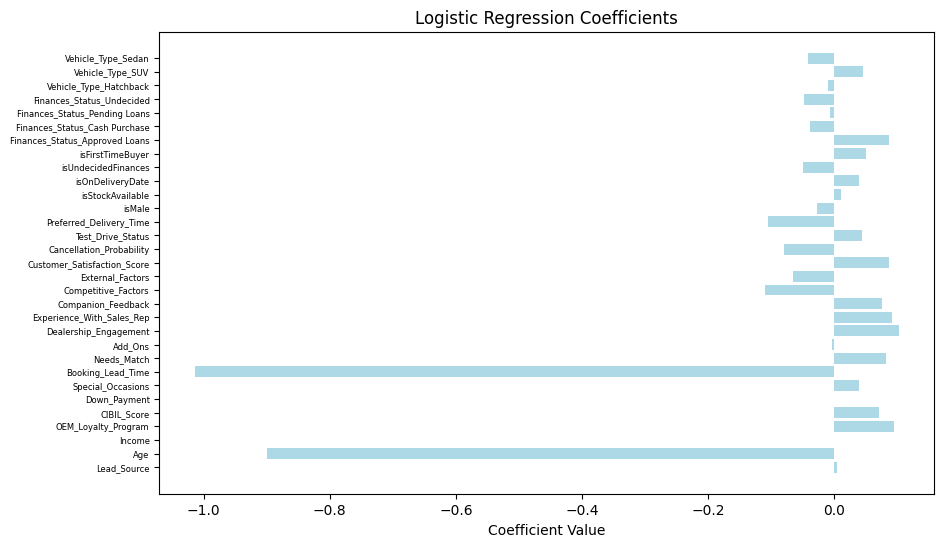

In [20]:
# import shap

# explainer = shap.LinearExplainer(model, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")
coefficients = model.coef_[0]

feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='lightblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.yticks(fontsize=6)
plt.show()

In [21]:
from sklearn.naive_bayes import BernoulliNB

bernaulliNB_model = BernoulliNB()
bernaulliNB_model.fit(X_train, y_train)
print(bernaulliNB_model.predict(X_test))

[1 0 1 0 1 0]


In [22]:
y_pred = bernaulliNB_model.predict(X_test)
y_prob = bernaulliNB_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
brierloss = brier_score_loss(y_test, y_prob)
classreport = classification_report(y_test, y_pred)

probs = [float(value) * 100 for value in y_prob]
print(f"Predicted Probabilities: {probs}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Brier Loss: {brierloss:.4f}")
print("Classification Report: ", classreport)

Predicted Probabilities: [99.9999890225366, 0.0033238712745171065, 99.9999859663114, 15.438387980225658, 52.54974467846362, 0.0016116015466911622]
Accuracy: 0.6667
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667
AUC: 0.8889
Log Loss: 0.4356
Brier Loss: 0.1652
Classification Report:                precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



In [23]:
neg_class_prob_sorted = bernaulliNB_model.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = bernaulliNB_model.feature_log_prob_[1, :].argsort()[::-1]

top_10_neg_class_features = neg_class_prob_sorted[:10]
top_10_pos_class_features = pos_class_prob_sorted[:10]

neg_class_feature_names = X_train.columns[top_10_neg_class_features]
pos_class_feature_names = X_train.columns[top_10_pos_class_features]

print("Top 10 Negative Class Features and their Log-Probabilities:")
for feature, log_prob in zip(neg_class_feature_names, bernaulliNB_model.feature_log_prob_[0, top_10_neg_class_features]):
    print(f"Feature: {feature}, Log-Probability: {log_prob}")

print("\nTop 10 Positive Class Features and their Log-Probabilities:")
for feature, log_prob in zip(pos_class_feature_names, bernaulliNB_model.feature_log_prob_[1, top_10_pos_class_features]):
    print(f"Feature: {feature}, Log-Probability: {log_prob}")

Top 10 Negative Class Features and their Log-Probabilities:
Feature: Booking_Lead_Time, Log-Probability: -0.07410797215372167
Feature: CIBIL_Score, Log-Probability: -0.07410797215372167
Feature: Income, Log-Probability: -0.07410797215372167
Feature: Age, Log-Probability: -0.07410797215372167
Feature: Down_Payment, Log-Probability: -0.07410797215372167
Feature: Add_Ons, Log-Probability: -0.07410797215372167
Feature: Customer_Satisfaction_Score, Log-Probability: -0.07410797215372167
Feature: Needs_Match, Log-Probability: -0.24116205681688774
Feature: Competitive_Factors, Log-Probability: -0.24116205681688774
Feature: Preferred_Delivery_Time, Log-Probability: -0.3364722366212125

Top 10 Positive Class Features and their Log-Probabilities:
Feature: Finances_Status_Approved Loans, Log-Probability: -0.07410797215372167
Feature: isOnDeliveryDate, Log-Probability: -0.07410797215372167
Feature: isFirstTimeBuyer, Log-Probability: -0.07410797215372167
Feature: Test_Drive_Status, Log-Probability: 

## Gausian Naive Bayes Model

In [24]:
from sklearn.naive_bayes import GaussianNB

GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train, y_train)
print(GaussianNB_model.predict(X_test))

[1 0 1 0 0 1]


In [25]:
y_pred = GaussianNB_model.predict(X_test)
y_prob = GaussianNB_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
brierloss = brier_score_loss(y_test, y_prob)
classreport = classification_report(y_test, y_pred)

probs = [float(value) * 100 for value in y_prob]
print(f"Predicted Probabilities: {probs}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Brier Loss: {brierloss:.4f}")
print("Classification Report: ", classreport)

Predicted Probabilities: [92.9736914605846, 48.98700644006487, 91.87158071056204, 0.029968807489513527, 18.620638815582875, 78.40154991102462]
Accuracy: 0.6667
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667
AUC: 0.6667
Log Loss: 1.7803
Brier Loss: 0.3167
Classification Report:                precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



In [26]:
import dalex as dx

exp = dx.Explainer(model, X, y)
df_index = pd.read_excel('BCI backup.xlsx', sheet_name='Dummy leads')

for i in range(len(X)):
    # Get feature importance
    breakdown = exp.predict_parts(X.iloc[i], type='break_down', label=X.index[0])
    breakdown.plot(title=df_index.iloc[i]['Customer name'])

Preparation of a new explainer is initiated

  -> data              : 20 rows 31 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 20 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002301F7EB560> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.02e-16, mean = 0.291, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.406, mean = -0.0406, max = 0.406
  -> model_info        : package sklearn

A new explainer has been created!


In [27]:
import ipywidgets as widgets
from ipywidgets import interact

importances = coefficients
importance_dict = dict(zip(X.columns, importances))
column_widget = widgets.Dropdown(options=list(importance_dict.keys()), value=list(importance_dict.keys())[0])
threshold_widget = widgets.FloatSlider(min=min(importances), max=max(importances), step=0.01, value=min(importances))

def filter_dataset(column, threshold):
    filtered_df = df.copy()
    for col, importance in importance_dict.items():
        if abs(importance) < abs(threshold) and col != column:
            filtered_df = filtered_df.drop(col, axis=1)
    return filtered_df


interact(filter_dataset, column=column_widget, threshold=threshold_widget);

interactive(children=(Dropdown(description='column', options=('Lead_Source', 'Age', 'Income', 'OEM_Loyalty_Pro…

In [28]:
import statsmodels.api as sm

logitmodel = sm.Logit(y,X).fit()
print(logitmodel.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               bciindex   No. Observations:                   20
Model:                          Logit   Df Residuals:                        0
Method:                           MLE   Df Model:                           19
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                   1.000
Time:                        12:38:54   Log-Likelihood:            -4.9263e-06
converged:                      False   LL-Null:                       -11.247
Covariance Type:            nonrobust   LLR p-value:                    0.2604
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Lead_Source                        7.8122        nan        nan        nan         nan         nan
Age  

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

c:\Users\mukulkathuria\Documents\mlprac\driveai\bcii

In [29]:
X.columns

Index(['Lead_Source', 'Age', 'Income', 'OEM_Loyalty_Program', 'CIBIL_Score',
       'Down_Payment', 'Special_Occasions', 'Booking_Lead_Time', 'Needs_Match',
       'Add_Ons', 'Dealership_Engagement', 'Experience_With_Sales_Rep',
       'Companion_Feedback', 'Competitive_Factors', 'External_Factors',
       'Customer_Satisfaction_Score', 'Cancellation_Probability',
       'Test_Drive_Status', 'Preferred_Delivery_Time', 'isMale',
       'isStockAvailable', 'isOnDeliveryDate', 'isUndecidedFinances',
       'isFirstTimeBuyer', 'Finances_Status_Approved Loans',
       'Finances_Status_Cash Purchase', 'Finances_Status_Pending Loans',
       'Finances_Status_Undecided', 'Vehicle_Type_Hatchback',
       'Vehicle_Type_SUV', 'Vehicle_Type_Sedan'],
      dtype='object')

In [30]:
df_Customerprofile = X[["isFirstTimeBuyer","Age", "isMale", "OEM_Loyalty_Program"]]
df_Finance = X[['Finances_Status_Approved Loans',
       'Finances_Status_Cash Purchase', 'Finances_Status_Pending Loans',
       'Finances_Status_Undecided', 'isUndecidedFinances', 'CIBIL_Score', 'Down_Payment']]
df_Bookingdetails = X[["Special_Occasions","Booking_Lead_Time", "Needs_Match", "Add_Ons"]]
df_deliveryDetails = X[["isOnDeliveryDate","isStockAvailable", "Customer_Satisfaction_Score", "Experience_With_Sales_Rep", "Dealership_Engagement"]]

logitsubmodel1 = sm.Logit(y,df_Customerprofile).fit()
print(logitsubmodel1.summary())

Optimization terminated successfully.
         Current function value: 0.230517
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               bciindex   No. Observations:                   20
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.5901
Time:                        12:38:54   Log-Likelihood:                -4.6103
converged:                       True   LL-Null:                       -11.247
Covariance Type:            nonrobust   LLR p-value:                  0.004082
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
isFirstTimeBuyer        2.6021      2.533      1.027      0.304      -2.362       7.566
Ag

In [31]:
logitsubmodel2 = sm.Logit(y,df_Finance).fit()
print(logitsubmodel2.summary())

         Current function value: 0.234933
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               bciindex   No. Observations:                   20
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.5822
Time:                        12:38:54   Log-Likelihood:                -4.6987
converged:                      False   LL-Null:                       -11.247
Covariance Type:            nonrobust   LLR p-value:                   0.04154
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Finances_Status_Approved Loans   -43.6832     53.178     -0.821      0.411    -147.909      60.543
Finan

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [32]:
logitsubmodel3 = sm.Logit(y,df_Bookingdetails).fit()
print(logitsubmodel3.summary())

Optimization terminated successfully.
         Current function value: 0.384743
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               bciindex   No. Observations:                   20
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.3158
Time:                        12:38:54   Log-Likelihood:                -7.6949
converged:                       True   LL-Null:                       -11.247
Covariance Type:            nonrobust   LLR p-value:                   0.06867
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Special_Occasions    -2.0616      2.404     -0.858      0.391      -6.773       2.649
Booking_

In [33]:
logitsubmodel4 = sm.Logit(y,df_deliveryDetails).fit()
print(logitsubmodel4.summary())

         Current function value: 0.263730
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               bciindex   No. Observations:                   20
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.5310
Time:                        12:38:54   Log-Likelihood:                -5.2746
converged:                      False   LL-Null:                       -11.247
Covariance Type:            nonrobust   LLR p-value:                   0.01777
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
isOnDeliveryDate               74.2880   4.04e+05      0.000      1.000   -7.93e+05    7.93e+05
isStockAvailab

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [34]:
logisticmodel1 = LogisticRegression()
logisticmodel1.fit(df_Customerprofile, y)
logisticmodel2 = LogisticRegression()
logisticmodel2.fit(df_Finance, y)
logisticmodel3 = LogisticRegression()
logisticmodel3.fit(df_Bookingdetails, y)
logisticmodel4 = LogisticRegression()
logisticmodel4.fit(df_deliveryDetails, y)

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [35]:
exp1 = dx.Explainer(logisticmodel1, df_Customerprofile, y)
exp2 = dx.Explainer(logisticmodel2, df_Finance, y)
exp3 = dx.Explainer(logisticmodel3, df_Bookingdetails, y)
exp4 = dx.Explainer(logisticmodel4, df_deliveryDetails, y)

Preparation of a new explainer is initiated

  -> data              : 20 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 20 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002301F7EB560> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0364, mean = 0.25, max = 0.677
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.677, mean = -3.2e-06, max = 0.719
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 20 rows 7 cols
  -> target variable   : P

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



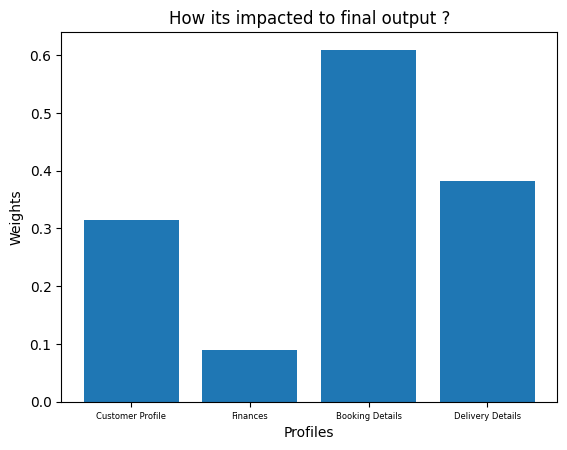

Final Prbability:  34.86


In [36]:
# lets find the index of a user
def getValuesofCustomer(person):
    index = np.where(df_index['Customer name'] == person)[0][0]
    to_predicted = X.iloc[int(index)]

    model1values = [to_predicted[df_Customerprofile.columns]]
    breakdown = exp1.predict_parts(to_predicted[df_Customerprofile.columns], type='break_down', label='Customer Profile')
    breakdown.plot(title=person)

    model2values = [to_predicted[df_Finance.columns]]
   
    breakdown = exp2.predict_parts(to_predicted[df_Finance.columns], type='break_down', label='Finances')
    breakdown.plot(title=person)

    model3values = [to_predicted[df_Bookingdetails.columns]]
    
    breakdown = exp3.predict_parts(to_predicted[df_Bookingdetails.columns], type='break_down', label='Booking Details')
    breakdown.plot(title=person)

    model4values = [to_predicted[df_deliveryDetails.columns]]
    
    breakdown = exp4.predict_parts(to_predicted[df_deliveryDetails.columns], type='break_down', label='Delivery Details')
    breakdown.plot(title=person)

    model1_predicted = logisticmodel1.predict_proba(model1values)[:,1][0]
    model2_predicted = logisticmodel2.predict_proba(model2values)[:,1][0]
    model3_predicted = logisticmodel3.predict_proba(model3values)[:,1][0]
    model4_predicted = logisticmodel4.predict_proba(model4values)[:,1][0]
    finalresult  = model1_predicted + model2_predicted + model3_predicted + model4_predicted
    bar_labels = ['Customer Profile', 'Finances', 'Booking Details', 'Delivery Details']
    bar_values = [model1_predicted,model2_predicted,model3_predicted,model4_predicted]
    plt.bar(bar_labels, bar_values)
    plt.title('How its impacted to final output ?')
    plt.xlabel('Profiles')
    plt.ylabel('Weights')
    plt.xticks(fontsize=6)
    plt.show()
    return round((finalresult * 100) / 4,2)

print("Final Prbability: ", getValuesofCustomer('Ramesh Choudhary'))

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



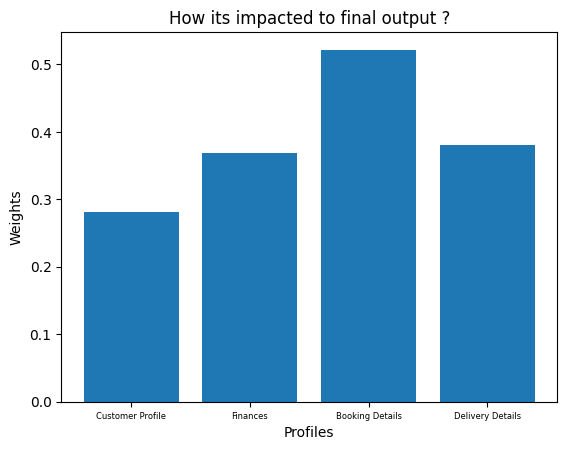

Final Prbability:  38.8


In [37]:
# Rahul Desai
print("Final Prbability: ", getValuesofCustomer('Rahul Desai'))

In [38]:
exp1 = dx.Explainer(logitsubmodel1, df_Customerprofile, y)
exp2 = dx.Explainer(logitsubmodel2, df_Finance, y)
exp3 = dx.Explainer(logitsubmodel3, df_Bookingdetails, y)
exp4 = dx.Explainer(logitsubmodel4, df_deliveryDetails, y)

Preparation of a new explainer is initiated

  -> data              : 20 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 20 values
  -> model_class       : statsmodels.discrete.discrete_model.BinaryResultsWrapper (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002301F7EB380> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000456, mean = 0.259, max = 0.904
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.904, mean = -0.00903, max = 0.596
  -> model_info        : package statsmodels

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 20 rows 7 cols
  -> target variable  

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\dalex\_explainer\object.py:138: UserWarning:


  -> predicted values  : 'predict_function' must return numpy.ndarray (1d)

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\dalex\_explainer\object.py:138: UserWarning:


  -> predicted values  : 'predict_function' must return numpy.ndarray (1d)

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\dalex\_explainer\object.py:138: UserWarning:


  -> predicted values  : 'predict_function' must return numpy.ndarray (1d)

c:\Users\mukulkathuria\Documents\mlprac\driveai\bciindexanalysis\bcienv\Lib\site-packages\dalex\_explainer\object.py:138: UserWarning:


  -> predicted values  : 'predict_function' must return numpy.ndarray (1d)



In [39]:
print(logitsubmodel3.summary())

                           Logit Regression Results                           
Dep. Variable:               bciindex   No. Observations:                   20
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.3158
Time:                        12:38:54   Log-Likelihood:                -7.6949
converged:                       True   LL-Null:                       -11.247
Covariance Type:            nonrobust   LLR p-value:                   0.06867
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Special_Occasions    -2.0616      2.404     -0.858      0.391      -6.773       2.649
Booking_Lead_Time    -0.1409      0.078     -1.798      0.072      -0.294       0.013
Needs_Match           2.

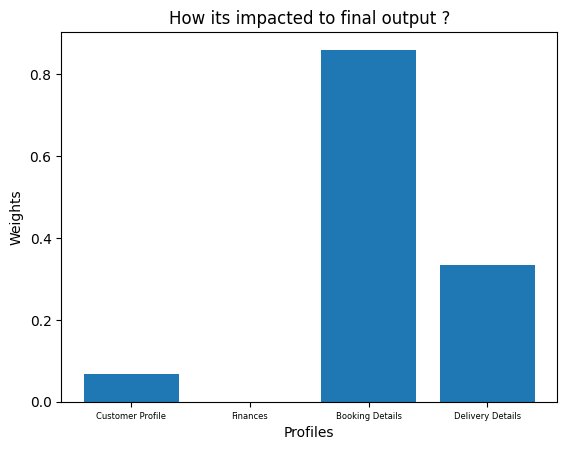

Final Prbability:  31.54


In [40]:
def getLogitValuesofCustomer(person):
    index = np.where(df_index['Customer name'] == person)[0][0]
    to_predicted = X.iloc[int(index)]

    model1values = [to_predicted[df_Customerprofile.columns]]
    
    breakdown = exp1.predict_parts(to_predicted[df_Customerprofile.columns], type='break_down', label='Customer Profile')
    breakdown.plot(title=person)

    model2values = [to_predicted[df_Finance.columns]]
   
    breakdown = exp2.predict_parts(to_predicted[df_Finance.columns], type='break_down', label='Finances')
    breakdown.plot(title=person)

    model3values = [to_predicted[df_Bookingdetails.columns]]
    
    breakdown = exp3.predict_parts(to_predicted[df_Bookingdetails.columns], type='break_down', label='Booking Details')
    breakdown.plot(title=person)

    model4values = [to_predicted[df_deliveryDetails.columns]]
    
    breakdown = exp4.predict_parts(to_predicted[df_deliveryDetails.columns], type='break_down', label='Delivery Details')
    breakdown.plot(title=person)

    # finalresult  = logitsubmodel1.predict(model1values)[0] + logitsubmodel2.predict(model2values)[0] + logitsubmodel3.predict(model3values)[0] + logitsubmodel4.predict(model4values)[0]
    model1_predicted = logitsubmodel1.predict(model1values)[0]
    model2_predicted = logitsubmodel2.predict(model2values)[0]
    model3_predicted = logitsubmodel3.predict(model3values)[0]
    model4_predicted = logitsubmodel4.predict(model4values)[0]
    finalresult  = model1_predicted + model2_predicted + model3_predicted + model4_predicted
    bar_labels = ['Customer Profile', 'Finances', 'Booking Details', 'Delivery Details']
    bar_values = [model1_predicted,model2_predicted,model3_predicted,model4_predicted]
    plt.bar(bar_labels, bar_values)
    plt.title('How its impacted to final output ?')
    plt.xlabel('Profiles')
    plt.ylabel('Weights')
    plt.xticks(fontsize=6)
    plt.show()
    return round((finalresult * 100) / 4,2)

print("Final Prbability: ", getLogitValuesofCustomer('Ramesh Choudhary'))